In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

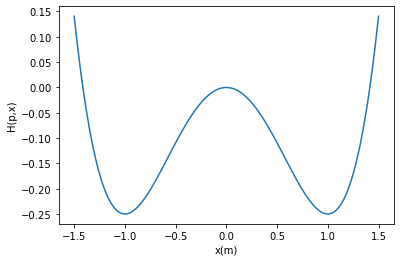

In [2]:

##########TASK 1###############

# alpha = 0
# beta = 0
# gamma = 0
# delta = 0

xmin, xmax = -2.0, 2.0
pmin, pmax = -1.0, 1.0

x, p = np.meshgrid(np.linspace(xmin, xmax, 100, endpoint=True), np.linspace(pmin, pmax, 100, endpoint=True))

alpha = 1
beta = -1

xpoint = p
ppoint = -beta*x-alpha*(x**3)

# Show if there is one or two minima depending the sign of beta
def H(x):
    H = 0.5*0**2 + 0.5*beta*x**2 + 0.25*alpha*x**4
    return H

xgrid = np.linspace(-1.5, 1.5, 100)
Hgrid = H(xgrid)

plt.plot(xgrid, Hgrid)
plt.xlabel("x(m)")
plt.ylabel("H(p,x)")
plt.show()



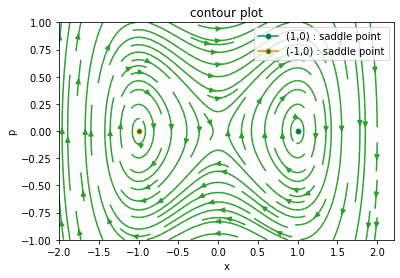

In [3]:
##########TASK 2###############

# plot the critical point and the contour plot
if beta == 1:
    plt.plot(0, 0, label = "(0,0) : focus point unstable", marker="o", markersize=5, markerfacecolor="red")
    plt.streamplot(x,p,xpoint,ppoint)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("p")
    plt.title("contour plot")
elif beta == -1:
    plt.plot(1, 0, label = "(1,0) : saddle point", marker="o", markersize=5, markerfacecolor="green")
    plt.plot(-1, 0, label = "(-1,0) : saddle point", marker="o", markersize=5, markerfacecolor="green")
    plt.streamplot(x,p,xpoint,ppoint)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("p")
    plt.title("contour plot")
plt.show()



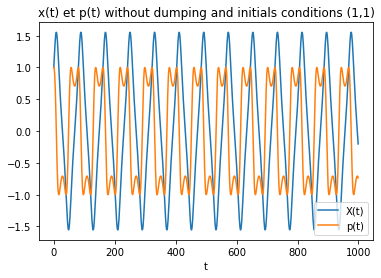

In [4]:

##########TASK 3############# SOLVING THE EQUATIONS

beta = -1
alpha = 1

def equation(Y, t, beta, alpha):
    x, p = Y
    dxdt = p
    dpdt = -beta*x-alpha*(x**3)
    return [dxdt, dpdt]
   
   
Y0 = [1,1]
t = np.linspace(0, 100, 1000)


solution = odeint(equation, Y0, t, args=(beta, alpha))
X = solution[:,0]
P = solution[:,1]



fig, ax = plt.subplots()
ax.plot(X, label = 'X(t)')
ax.plot(P, label = 'p(t)')
ax.set_xlabel('t')
ax.set_title('x(t) et p(t) without dumping and initials conditions (1,1)')
ax.legend()

plt.show()



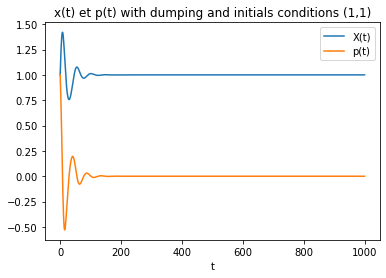

In [5]:

########### TASK 4 ############### ADDING DELTA
delta = 0.8
alpha = 1
beta = -1

def equation2(Y, t, beta, alpha, delta):
    x, p = Y
    dxdt = p
    dpdt = -beta*x-alpha*(x**3)-delta*p
    return [dxdt, dpdt]
 
solution2 = odeint(equation2, Y0, t, args=(beta, alpha, delta))
X = solution2[:,0]
P = solution2[:,1]
fig, ax = plt.subplots()
ax.plot(X, label = 'X(t)')
ax.plot(P, label = 'p(t)')
ax.set_xlabel('t')
ax.set_title('x(t) et p(t) with dumping and initials conditions (1,1)')
ax.legend()



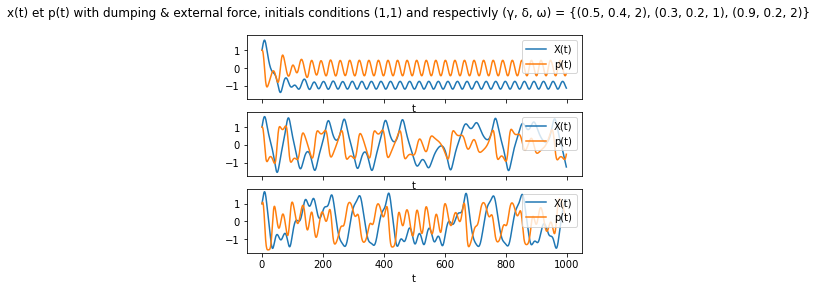

In [6]:
############### TASK 5 ############### ADDING GAMMA AND OMEGA

gamma = 0.5
delta = 0.4
omega = 2

"""For the sets {(0.5, 0.4, 2),(0.3, 0.2, 1),(0.9, 0.2, 2)} we can see that
the system is becoming chaotic for the 2 last sets"""
 
""" Also, omega is the term that can change the system into chaotic"""

def equation3(Y, t, beta, alpha, delta, gamma, omega):
    x, p = Y
    dxdt = p
    dpdt = -beta*x-alpha*(x**3)+gamma*np.cos(omega*t)-delta*p
    return [dxdt, dpdt]
 

solution3a = odeint(equation3, Y0, t, args=(beta, alpha, 0.4, 0.5, 2))
Xa = solution3a[:,0]
Pa = solution3a[:,1]
solution3b = odeint(equation3, Y0, t, args=(beta, alpha, 0.2, 0.3, 1))
Xb = solution3b[:,0]
Pb = solution3b[:,1]
solution3c = odeint(equation3, Y0, t, args=(beta, alpha, 0.2, 0.9, 2))
Xc = solution3c[:,0]
Pc = solution3c[:,1]
fig, ax = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('x(t) et p(t) with dumping & external force, initials conditions (1,1) and respectivly (γ, δ, ω) = {(0.5, 0.4, 2), (0.3, 0.2, 1), (0.9, 0.2, 2)}')
#first set
ax1 = ax[0]
ax1.plot(Xa, label = 'X(t)')
ax1.plot(Pa, label = 'p(t)')
ax1.set_xlabel('t')
ax1.legend(loc = 1)
#second set
ax2 = ax[1]
ax2.plot(Xb, label = 'X(t)')
ax2.plot(Pb, label = 'p(t)')
ax2.set_xlabel('t')
ax2.legend(loc = 1)
#third set
ax3 = ax[2]
ax3.plot(Xc, label = 'X(t)')
ax3.plot(Pc, label = 'p(t)')
ax3.set_xlabel('t')
ax3.legend(loc = 1)
plt.show()



 
Duffing.py


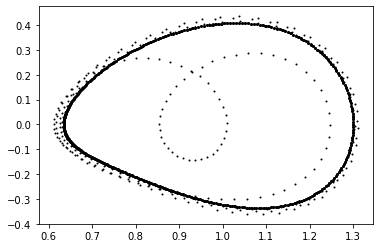

<Figure size 432x288 with 0 Axes>

In [7]:

############### TASK 6 ###############

# dt_per_period = 5000
# tf = (2*np.pi)/omega
# dt = 2*np.pi/omega / dt_per_period
# step = int(period / dt)


 
# model_case 1 = Pendulum
# model_case 2 = Double Well

print(' ')
print('Duffing.py')
 
alpha = 1       # 1
beta = -1         # -1
delta = 0.3       # 0.3
gam = 0.15    # 0.15
omega = 1  #1

def flow_deriv(X,tspan):
    x, p = X
    dxdt = p
    dpdt = delta*np.cos(omega*tspan) - beta*x - alpha*x**3 - gamma*p
    return[dxdt,dpdt]
                 
T = 2*np.pi/omega
 
# px1 = np.random.rand(1)
# xp1 = np.random.rand(1)
# w1 = 0

xp1 = 1
px1 = 0

 
X = [xp1, px1]
 
# Settle-down Solve for the trajectories
t = np.linspace(0, 5000, 50000)
x_t = odeint(flow_deriv, X, t)
x0 = x_t[39999,0:2]
 
tspan = np.linspace(1,50000,500000)
x_t = odeint(flow_deriv, x0, tspan)
siztmp = np.shape(x_t)
siz = siztmp[0]
 
y1 = x_t[:,0]
y2 = x_t[:,1]
     
plt.figure(2)
lines = plt.plot(y1[1:5000],y2[1:5000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
   
plt.savefig('Duffing')


